## LM-learning_DL

### 1.基础

#### 数据操作

In [3]:
import torch # type: ignore

X = torch.arange(12)
X

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
x = torch.arange(12)
x.shape,x.numel()



In [4]:
x.reshape(3,4)
x


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
torch.zeros((2,3,4))
# torch.ones((2,3,4))
# torch.randn((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [6]:
torch.tensor([[2,2,2,3],[2,5,6,4],[12,2,23,4]])

tensor([[ 2,  2,  2,  3],
        [ 2,  5,  6,  4],
        [12,  2, 23,  4]])

In [7]:
x = torch.tensor([1,2,4,8])
y = torch.tensor([2,2,3,3])
x+y,x-y,x*y,x/y,x**y

(tensor([ 3,  4,  7, 11]),
 tensor([-1,  0,  1,  5]),
 tensor([ 2,  4, 12, 24]),
 tensor([0.5000, 1.0000, 1.3333, 2.6667]),
 tensor([  1,   4,  64, 512]))

In [8]:
torch.exp(x)


tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [9]:
X=torch.arange(12,dtype=torch.float32).reshape((3,4))
Y=torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((X,Y),dim=0),torch.cat((X,Y),dim=1) # 张量拼接

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [10]:
X==Y # 判定是否元素相等

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [11]:
X.sum()

tensor(66.)

In [12]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b,a+b  # python 广播

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

In [13]:
before = id(Y) # id() returns the id of an object
Y = Y + X
id(Y) == before

False

In [14]:
Z = torch.zeros_like(Y)   # 产生一个形状相同的矩阵
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 1749960643184
id(Z): 1749960643184


#### 数据读取和处理

In [15]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [ ]:
import pandas as pd # type: ignore

data = pd.read_csv(data_file)
print(data)

注意，“NaN”项代表缺失值。 为了处理缺失的数据，典型的方法包括插值法和删除法， 其中插值法用一个替代值弥补缺失值，而删除法则直接忽略缺失值。 在这里，我们将考虑插值法。

通过位置索引iloc，我们将data分成inputs和outputs， 其中前者为data的前两列，而后者为data的最后一列。 对于inputs中缺少的数值，我们用同一列的均值替换“NaN”项。

In [ ]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

对于inputs中的类别值或离散值，我们将“NaN”视为一个类别。 由于“巷子类型”（“Alley”）列只接受两种类型的类别值“Pave”和“NaN”， pandas可以自动将此列转换为两列“Alley_Pave”和“Alley_nan”。 巷子类型为“Pave”的行会将“Alley_Pave”的值设置为1，“Alley_nan”的值设置为0。 缺少巷子类型的行会将“Alley_Pave”和“Alley_nan”分别设置为0和1。

In [ ]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

数据转换

In [ ]:
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

#### 线性代数


In [ ]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [ ]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

就像向量是标量的推广，矩阵是向量的推广一样，我们可以构建具有更多轴的数据结构。 张量（本小节中的“张量”指代数对象）是描述具有任意数量轴的
维数组的通用方法。 例如，向量是一阶张量，矩阵是二阶张量。 张量用特殊字体的大写字母表示,它们的索引机制与矩阵类似。

当我们开始处理图像时，张量将变得更加重要，图像以
维数组形式出现， 其中3个轴对应于高度、宽度，以及一个通道（channel）轴， 用于表示颜色通道（红色、绿色和蓝色）。 现在先将高阶张量暂放一边，而是专注学习其基础知识。

In [ ]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B,A * B # Hadamard积

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]),
 tensor([[  0.,   1.,   4.,   9.],
         [ 16.,  25.,  36.,  49.],
         [ 64.,  81., 100., 121.],
         [144., 169., 196., 225.],
         [256., 289., 324., 361.]]))

##### 降维

axis = 0按照行，可以理解为把“行”给抹去只剩1行，也就是上下压扁。


axis = 1按照列，可以理解为把“列”给抹去只剩1列，也就是左右压扁。

In [ ]:
A_sum_axis0 = A.sum(axis=0) # type: ignore # 沿一个方向求和
A_sum_axis0

tensor([40., 45., 50., 55.])

In [ ]:
A.sum(axis=[0, 1])  # type: ignore # 结果和A.sum()相同

tensor(190.)

In [ ]:
sum_A = A.sum(axis=1, keepdims=True) # type: ignore # 非降维求和
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [ ]:
x = torch.ones(4, dtype = torch.float32)
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([1., 1., 1., 1.]), tensor([1., 1., 1., 1.]), tensor(4.))

In [ ]:

A.shape, x.shape, torch.mv(A, x) # 矩阵-向量积，我们使用mv函数

(torch.Size([5, 4]), torch.Size([4]), tensor([ 6., 22., 38., 54., 70.]))

In [ ]:
B = torch.ones(4, 3)
torch.mm(A, B) # 矩阵-矩阵乘法（matrix-matrix multiplication）

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

##### 范数
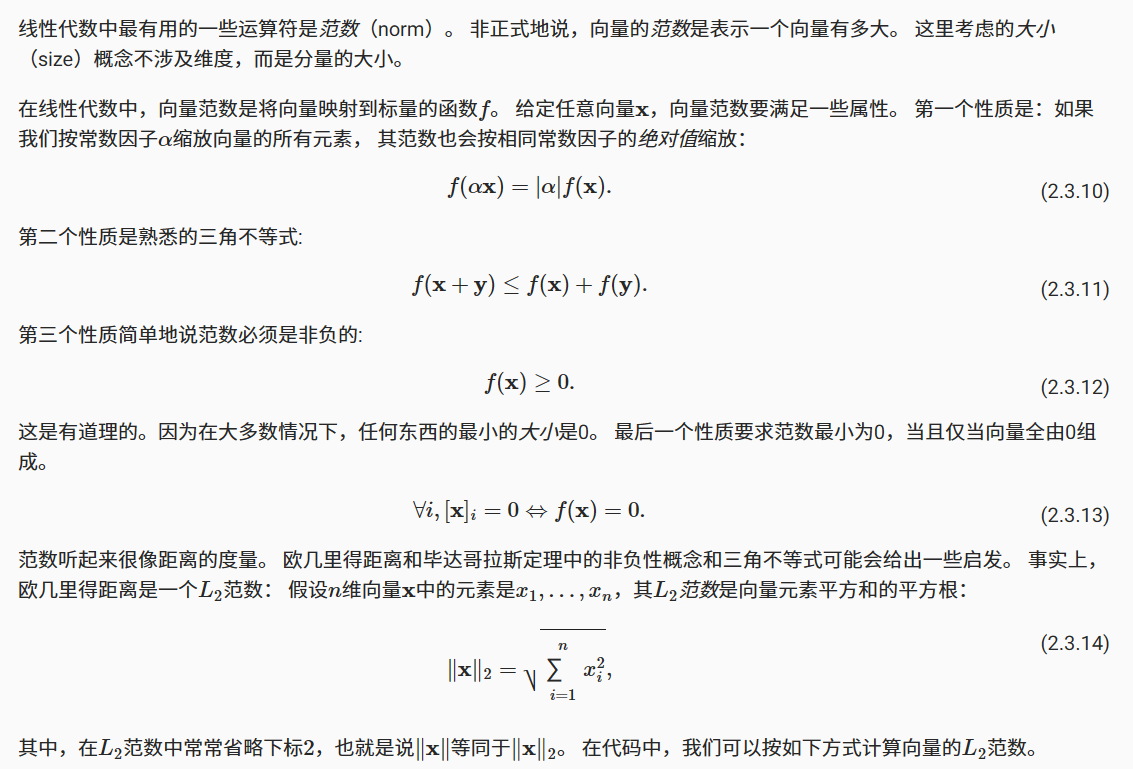

In [4]:
import numpy as np

u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

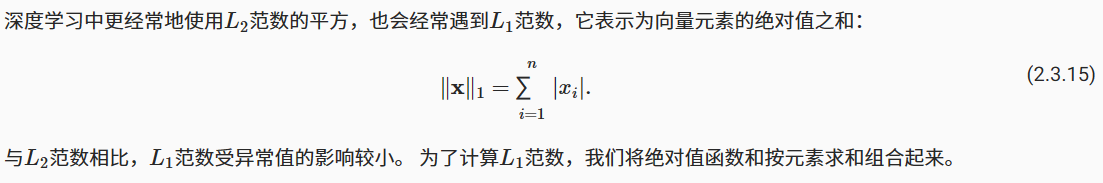

In [ ]:
torch.abs(u).sum()

tensor(7.)

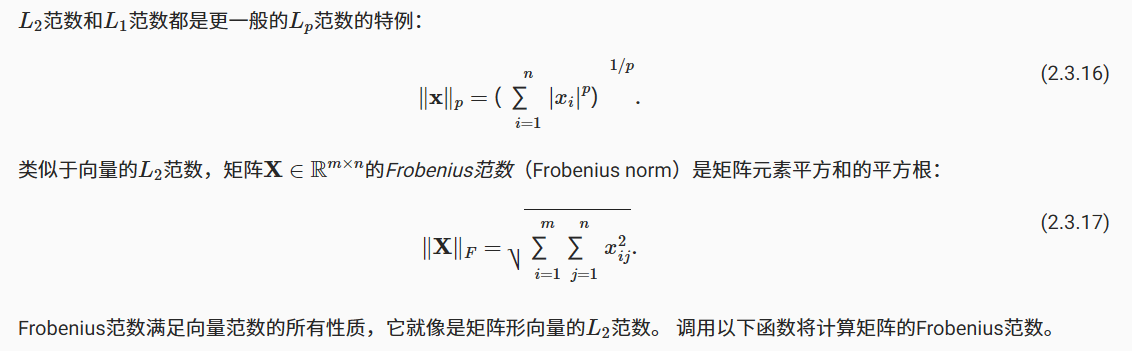

In [ ]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

#### 微积分



In [5]:
%matplotlib inline
import numpy as np # type: ignore
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline # type: ignore
# from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

In [6]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [27]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

In [28]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

In [29]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [38]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

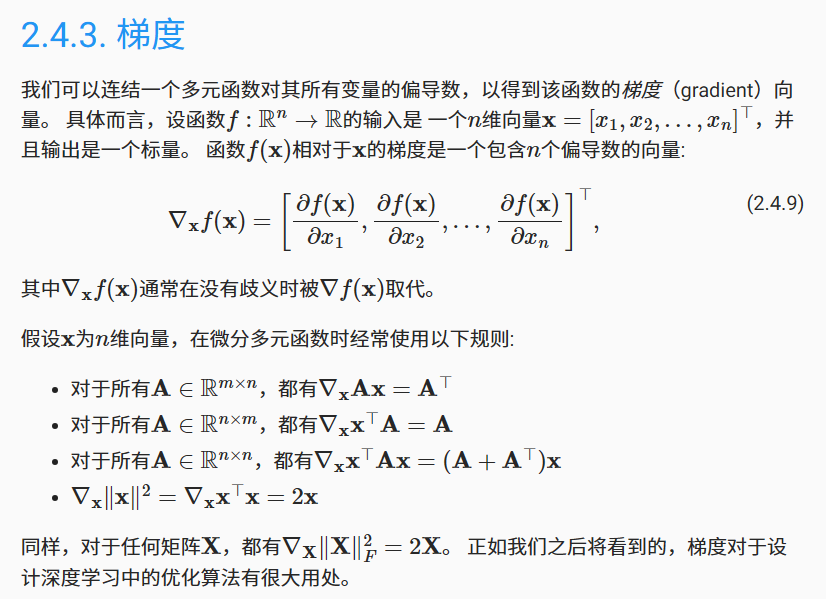

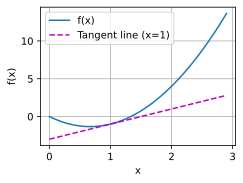

In [39]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])


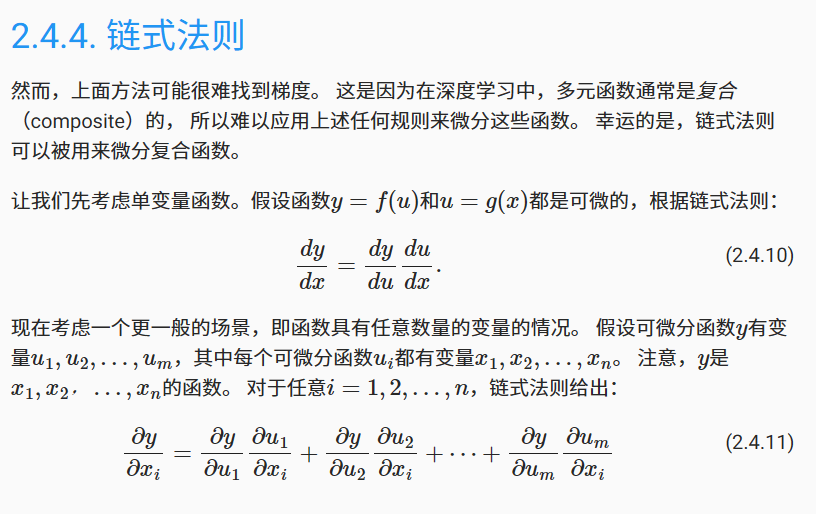

#### 自动微分

In [40]:

x = torch.arange(4.0)

x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad  # 默认值是None

In [46]:
y = 2 * torch.dot(x, x)+torch.exp(x)
y

tensor([29.0000, 30.7183, 35.3891, 48.0855], grad_fn=<AddBackward0>)

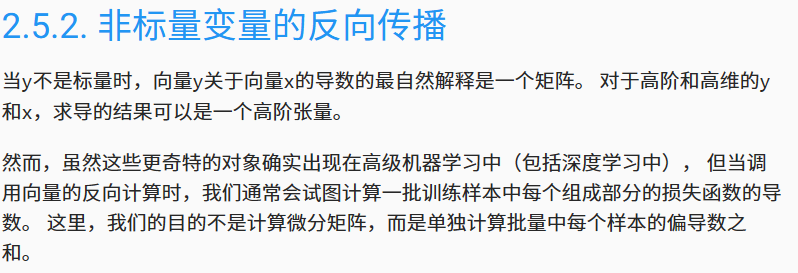

In [48]:
y = y.sum()  # 将y转换为标量
y.backward()  
x.grad

tensor([ 1.0000, 22.7183, 47.3891, 80.0855])

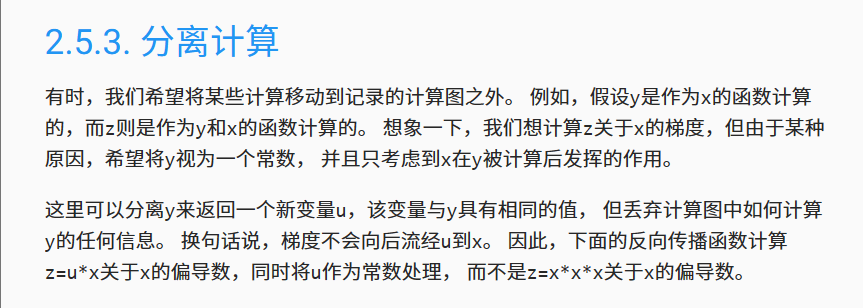

In [51]:
x.grad.zero_() # type: ignore
y = x * x
u = y.detach() # 新的变量
z = u * x

z.sum().backward()
x.grad == u,x.grad

(tensor([True, True, True, True]), tensor([0., 1., 4., 9.]))

In [52]:
def f(a):  # 控制流梯度计算
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [53]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [54]:
a.grad == d / a

tensor(True)

#### 概率论

In [55]:
%matplotlib inline
import torch # type: ignore
from torch.distributions import multinomial # type: ignore
import matplotlib.pyplot as plt

In [56]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

In [57]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 3., 0., 1., 1., 4.])

In [64]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1630, 0.1630, 0.1640, 0.1650, 0.1870, 0.1580])

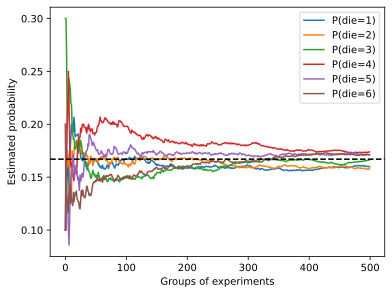

In [77]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,)) # type: ignore
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True) # type: ignore

plt.figure(figsize=(6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend()

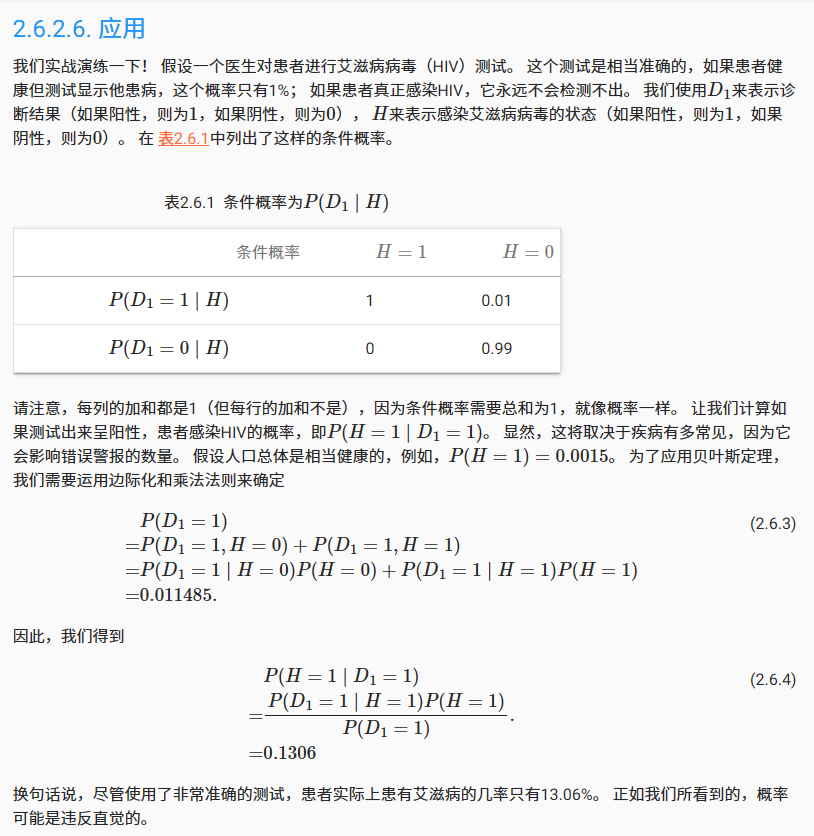

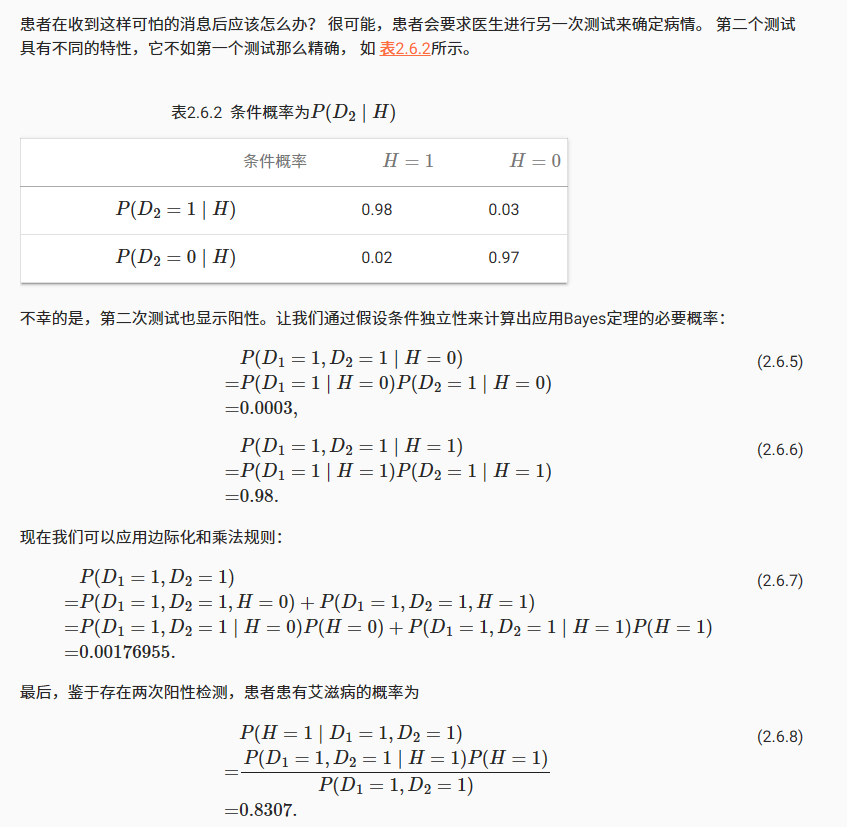

也就是说，第二次测试使我们能够对患病的情况获得更高的信心。 尽管第二次检验比第一次检验的准确性要低得多，但它仍然显著提高我们的预测概率。

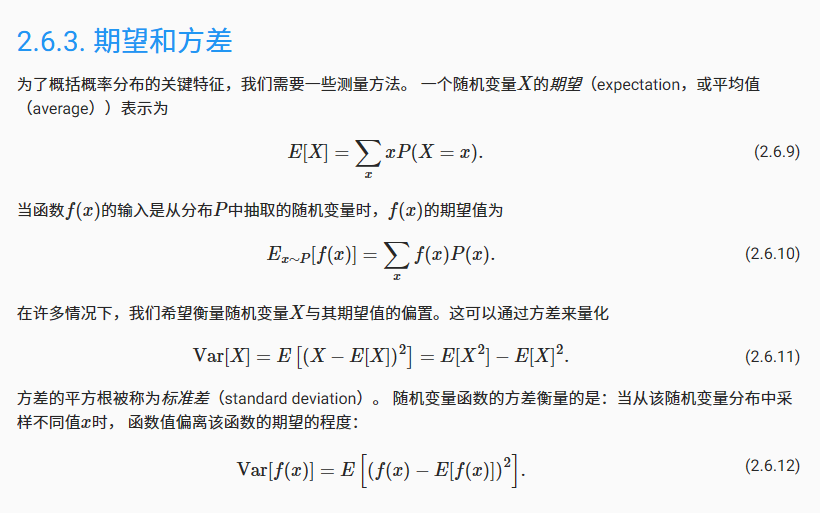

### 2.线性网络

In [2]:
import numpy as np # type: ignore
# import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import torch # type: ignore
import sklearn as sklearn
import torch.utils.data as Data  # type: ignore
from torch.nn import init  # type: ignore #导入初始化模块

#生成数据集
num_inputs = 2  #特征数，数据集的列数
num_examples = 1000  #样本数，数据集的行数
true_w = [2,-3.4]  #线性模型的真实权重
true_b = 4.2    #线性模型的真实偏差

featrues = torch.randn(num_examples,num_inputs,dtype = torch.float32)
#使用随机张量函数，生成一个1000行2列的随机张量
labels = true_w[0]*featrues[:,0]+true_w[1]*featrues[:,1]+true_b
#使用随机张量作为输入生成一组标签
labels += torch.tensor(np.random.normal(0,0.01,size = labels.size()),dtype = torch.float32)
#为标签加随机噪声，生成随机噪声方法：使用numpy库的random.normal生成一个均值为0，标准差为0.0.1的正态分布，其大小为1行2000个的行向量。
#在这一部分，使用了两种随机矩阵生成的方法，主要区别是第二个为正态分布。且第二种生成的行向量。


In [3]:
batch_size = 10
dataset = Data.TensorDataset(featrues,labels)

data_iter = Data.DataLoader(dataset,batch_size,shuffle=True)
# data_iter = load_array((torch.tensor(features, dtype=torch.float),torch.tensor(labels.reshape(1000,1), dtype=torch.float)), batch_size)

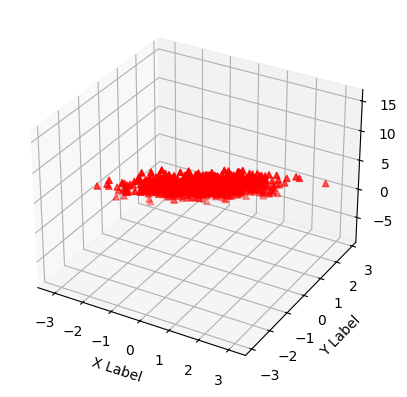

In [4]:
##画个简单三维图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
ax = plt.figure().add_subplot(111, projection = '3d')
#基于ax变量绘制三维图
#xs表示x方向的变量
#ys表示y方向的变量
#zs表示z方向的变量，这三个方向上的变量都可以用list的形式表示
#m表示点的形式，o是圆形的点，^是三角形（marker)
#c表示颜色（color for short）
ax.scatter(featrues[:,0], featrues[:,1], labels, c = 'r', marker = '^') #点为红色三角形
 
#设置坐标轴
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label') # type: ignore
 
#显示图像
plt.show()
 
# ax = plt.figure().add_subplot(111, projection = '3d')
 
# fig = plt.figure()
# ax = fig.add_subplot(111, projection = '3d')

In [5]:
next(iter(data_iter))

[tensor([[-0.2806, -0.3192],
         [-0.1601,  0.1581],
         [-0.9711,  0.4569],
         [-0.2148,  0.3435],
         [ 1.0299, -1.5469],
         [ 1.1913,  2.1846],
         [-1.3651,  0.1708],
         [ 0.5732,  0.4507],
         [-0.0340, -0.0850],
         [-1.1087,  0.2121]]),
 tensor([ 4.7500,  3.3419,  0.7013,  2.5856, 11.5207, -0.8253,  0.8946,  3.8343,
          4.4302,  1.2602])]

In [6]:
import torch.nn as nn

class Linear(nn.Module):
    def __init__(self,n_feature):
        super(Linear,self).__init__()
        
        self.linear = nn.Linear(n_feature,1)
        
    def forward(self,x):
        y = self.linear(x)
        return y
    
net = Linear(num_inputs)  #实例化这个类

#参数初始化
init.normal_(net.linear.weight,mean=0,std = 0.01)  #初始化权重为均值为0，标准差为0.01正态分布
init.constant_(net.linear.bias,val=0)  #初始化偏差为0
print(net.linear.weight)
print(net.linear.bias)

Parameter containing:
tensor([[-0.0030,  0.0031]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [7]:
loss = nn.MSELoss()

In [8]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)

In [9]:
num_epochs = 300
best_l = 999
bw = 0
bb = 0
for epoch in range(1,num_epochs+1):
    for X,y in data_iter:
        output = net(X)
        l = loss(output,y.view(-1,1))
        optimizer.zero_grad()  #梯度清零
        l.backward()
        optimizer.step()  #计算出优化得到的参数值
    if l.item()<best_l:
        print('epoch %d | loss:%f' %(epoch,l.item()))
        best_l = l.item()
        bw = net.linear.weight
        bb = net.linear.bias
        
    # w = net[0].weight.data
    # true_w_tensor = torch.tensor(true_w).reshape(w.shape)
    # print('Estimated error in w:', true_w_tensor - w)
    # b = net[0].bias.data
    # print('Estimated error in b:', true_b - b)
    

epoch 1 | loss:0.010885
epoch 2 | loss:0.000085
epoch 9 | loss:0.000071
epoch 11 | loss:0.000042
epoch 22 | loss:0.000038
epoch 23 | loss:0.000035
epoch 53 | loss:0.000028
epoch 61 | loss:0.000023
epoch 174 | loss:0.000016


In [10]:
print(true_w,'\n',bw)
print(true_b,'\n',bb)

[2, -3.4] 
 Parameter containing:
tensor([[ 1.9998, -3.4002]], requires_grad=True)
4.2 
 Parameter containing:
tensor([4.1997], requires_grad=True)


### 3.Softmax Regression

In [34]:
import torch.utils.data
from IPython import display
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import torchvision.transforms
import numpy as np

def load_data_fashion_mnist(batch_size, resize = 0):
    """Download the Fashion-MNIST dataset and then load into memory."""
    train_dataset = datasets.FashionMNIST(
        root="data", train=True, download=True, transform=ToTensor())
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True)  # type: ignore

    test_dataset = datasets.FashionMNIST(
        root="data", train=False, download=True, transform=ToTensor())
    test_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=batch_size, shuffle=True)  # type: ignore

    if resize != 0:
        resize_fn = torchvision.transforms.Compose([
            torchvision.transforms.Resize(resize),
            torchvision.transforms.ToTensor()
        ])
        train_dataset.transform = resize_fn
        test_dataset.transform = resize_fn
    return train_loader, test_loader


batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [4]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
# 0-->mean,0.01-->std
b = torch.zeros(num_outputs, requires_grad=True)


In [5]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True) # type: ignore
    return X_exp / partition  # 这里应用了广播机制

In [6]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [7]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

# X = torch.randn(2, 5)  # Replace this with the input tensor that you are trying to pass to the softmax function
# X_softmax = torch.softmax(X, dim=1)
# print(X_softmax)

(tensor([[0.1315, 0.0731, 0.0541, 0.6471, 0.0942],
         [0.6247, 0.1000, 0.0350, 0.1245, 0.1158]]),
 tensor([1., 1.]))

In [23]:
def net(X): # reshape(-1指这一维不知道多大，如2*4-->1*8,其中1已知时，8可以替换为-1)
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [6]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [7]:
def cross_entropy(y_hat, y):
    """
    Calculates the cross-entropy loss between the predicted probabilites and the true labels.

    Parameters:
    -----------
    y_hat: torch.Tensor
        A tensor of predicted probabilities with shape (batch_size, num_classes)
    y: torch.Tensor
        A tensor of true labels with shape (batch_size,)

    Returns:
    --------
    torch.Tensor
        A tensor of cross-entropy loss values with shape (batch_size,)
    """
    return - torch.log(y_hat[range(len(y_hat)), y])

# cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

我们将继续使用之前定义的变量y_hat和y分别作为预测的概率分布和标签。 可以看到，第一个样本的预测类别是2（该行的最大元素为0.6，索引为2），这与实际标签0不一致。 第二个样本的预测类别是2（该行的最大元素为0.5，索引为2），这与实际标签2一致。 因此，这两个样本的分类精度率为0.5。

In [8]:
def accuracy(y_hat, y):
    """
    Compute the number of correct predictions.

    Parameters:
        y_hat (torch.Tensor): A tensor of predicted probabilities with shape
            (batch_size, num_classes)
        y (torch.Tensor): A tensor of true labels with shape (batch_size,)

    Returns:
        float: The number of correct predictions.

    """
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y # 类型转换
    return float(cmp.type(y.dtype).sum())

# accuracy(y_hat, y) / len(y)

这里定义一个实用程序类Accumulator，用于对多个变量进行累加。 在上面的evaluate_accuracy函数中， 我们在Accumulator实例中创建了2个变量， 分别用于存储正确预测的数量和预测的总数量。 当我们遍历数据集时，两者都将随着时间的推移而累加。

In [9]:
class Accumulator:
    def __init__(self,n):
        self.data = [0.0] * n
    
    def add(self, *args):
        self.data = [a + float(b) for a,b in zip(self.data,args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [14]:
evaluate_accuracy(net, test_iter)

0.1361

In [13]:
def train_epoch_ch3(net, train_iter,loss,updater):
    if isinstance(net, torch.nn.Module):
        net.train()
    metric = Accumulator(3)
    for X,y in train_iter:
        y_hat =net(X)
        l = loss(y_hat,y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.mean().backward()
            updater.step()
            # metric.add(float(l)*len(y),accuracy(y_hat,y),y.numel())
        else:
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()),accuracy(y_hat,y),y.numel())
    
    return metric[0]/metric[2],metric[1]/metric[2]

In [14]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    best_acc = 1
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        train_loss, train_acc = train_metrics

        print(f'epoch{epoch+1}', 
            f'train loss {train_loss:.3f}', 
            f'test acc {test_acc:.3f}')
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [15]:
lr = 0.1

def updater(batch_size):
    return torch.optim.SGD([W, b], lr, batch_size)

In [ ]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

### 4.MLP

In [21]:
import torch
from torch import nn

dropout1,dropout2 = 0.2,0.2

net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Dropout(dropout1),
                    nn.Linear(256, 128),
                    nn.ReLU(),
                    nn.Dropout(dropout2),
                    nn.Linear(128, 64),
                    nn.ReLU(),
                    nn.Linear(64, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2, inplace=False)
  (7): Linear(in_features=128, out_features=64, bias=True)
  (8): ReLU()
  (9): Linear(in_features=64, out_features=10, bias=True)
)

In [23]:
batch_size, lr, num_epochs = 256, 0.1, 20
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = load_data_fashion_mnist(batch_size)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

epoch1 train loss 0.357 test acc 0.838
epoch2 train loss 0.353 test acc 0.849
epoch3 train loss 0.343 test acc 0.853
epoch4 train loss 0.340 test acc 0.868
epoch5 train loss 0.332 test acc 0.848
epoch6 train loss 0.329 test acc 0.858
epoch7 train loss 0.319 test acc 0.870
epoch8 train loss 0.317 test acc 0.870
epoch9 train loss 0.311 test acc 0.867
epoch10 train loss 0.305 test acc 0.862
epoch11 train loss 0.305 test acc 0.856
epoch12 train loss 0.299 test acc 0.866
epoch13 train loss 0.294 test acc 0.865
epoch14 train loss 0.290 test acc 0.844
epoch15 train loss 0.287 test acc 0.869
epoch16 train loss 0.283 test acc 0.880
epoch17 train loss 0.277 test acc 0.868
epoch18 train loss 0.276 test acc 0.876
epoch19 train loss 0.271 test acc 0.855
epoch20 train loss 0.270 test acc 0.866


['t-shirt', 't-shirt', 'sneaker', 'bag', 'pullover', 'shirt', 'dress', 'sandal', 'sneaker', 'shirt', 'sneaker', 'sandal', 'dress', 'trouser', 'sneaker', 'sneaker', 'pullover', 'pullover', 'bag', 'sandal', 'ankle boot', 'sandal', 'pullover', 'sandal', 'coat', 'coat', 't-shirt', 'dress', 'sandal', 'shirt', 't-shirt', 't-shirt', 'sandal', 'trouser', 'trouser', 'ankle boot', 'dress', 'sandal', 'coat', 'sneaker', 't-shirt', 'bag', 'sandal', 't-shirt', 'dress', 'shirt', 'pullover', 'shirt', 'bag', 'bag', 'dress', 'pullover', 'sneaker', 'dress', 'coat', 'trouser', 'ankle boot', 'coat', 'sandal', 'pullover', 't-shirt', 'trouser', 'sandal', 'trouser', 'coat', 'coat', 'bag', 'trouser', 'coat', 'coat', 'dress', 't-shirt', 'shirt', 'dress', 'ankle boot', 'pullover', 'sandal', 't-shirt', 'bag', 'ankle boot', 'dress', 'trouser', 't-shirt', 'shirt', 'sneaker', 'sandal', 'trouser', 'dress', 'trouser', 't-shirt', 'pullover', 'bag', 't-shirt', 'bag', 'shirt', 'sneaker', 't-shirt', 't-shirt', 't-shirt', 

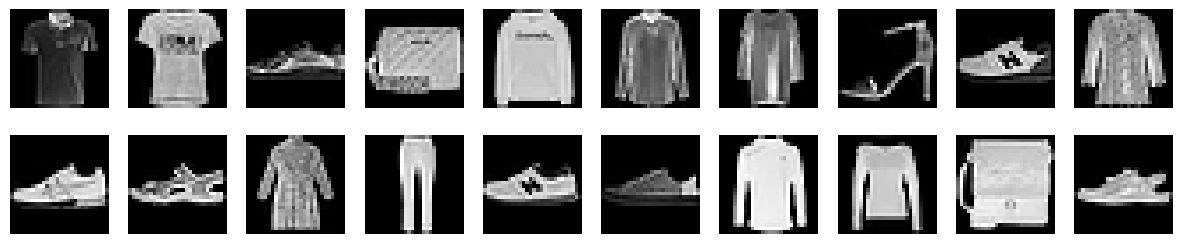

In [ ]:
import matplotlib.pyplot


import matplotlib.pyplot as plt
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols*scale,num_rows * scale)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            ax = axes[i][j] # type: ignore
            ax.imshow(imgs[i * num_cols + j],cmap='gray')
            ax.axis('off')
    if titles:
        ax.set_title(titles[i *num_cols + j])
    plt.show()

# 实现get_fashion_mnist_labels函数
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


#将 PyTorch 张量转换为 NumPy 数组，并将像素值还原
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""

    for X, y in test_iter:
        break
    trues = get_fashion_mnist_labels(y)
    preds = get_fashion_mnist_labels(net(X).argmax(axis=1))
    # titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    print(trues)
    print(preds)
    X = X.detach().numpy()
    X = ((X * 0.5) + 0.5) * 255
    X = X.astype('uint8')

    # Reshape the images from (batch_size, height, width, channels) to (batch_size, height, width)
    X = X.reshape(-1, 28, 28)

    # 展示图片
    show_images(X, num_rows=2, num_cols=10)


predict_ch3(net, test_iter)

#### 过拟合

解决方法:

- 正则化

- dropout

- 残差链接



In [ ]:
# torch.Dropout

#### 预测房价

In [1]:

import hashlib
import os
import tarfile
import zipfile
import requests

#@save
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

def download(name, cache_dir=os.path.join('..', 'data')): #@save
    assert name in DATA_HUB,f"{name} 不存在于 {DATA_HUB}" # 确保文件名存在
    url, sha1_hash = DATA_HUB[name]  # 获得下载地址和哈希值
    os.makedirs(cache_dir, exist_ok=True)  # 生成文件夹
    fname = os.path.join(cache_dir, url.split('/')[-1])  # 获得文件名
    if os.path.exists(fname):  # 如果文件存在
        sha1 = hashlib.sha1()  # 创建一个sha1对象
        with open(fname, 'rb') as f:  # 以二进制方式打开文件
            while True:
                data = f.read(1048576)  # 读取文件，每次读取1MB
                if not data:  # 如果没有数据了
                   break
                sha1.update(data)  # 更新sha1对象
        if sha1.hexdigest() == sha1_hash:  # 如果哈希值相同
            return  # 直接返回
    print(f'正在{url}下载{fname}...')
    r = requests.get(url, stream=True, verify=True)  # 下载文件
    with open(fname, 'wb') as f:  # 以二进制方式打开文件
        f.write(r.content)
    return fname

def download_extract(name, folder=None):  #@save
    """下载并解压zip/tar文件"""
    fname = download(name)
    base_dir = os.path.dirname(fname) # type: ignore
    data_dir, ext = os.path.splitext(fname) # type: ignore
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r') # type: ignore
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar文件可以被解压缩'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

def download_all():  #@save
    """下载DATA_HUB中的所有文件"""
    for name in DATA_HUB:
        download(name)

In [1]:
# 如果没有安装pandas，请取消下一行的注释
# !pip install pandas

%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn

# DATA_HUB['kaggle_house_train'] = (  #@save
#     DATA_URL + 'kaggle_house_pred_train.csv',
#     '585e9cc93e70b39160e7921475f9bcd7d31219ce')

# DATA_HUB['kaggle_house_test'] = (  #@save
#     DATA_URL + 'kaggle_house_pred_test.csv',
#     'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')

DATA_HUB = {
    'kaggle_hous_pred_train.csv': ('http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv', 'sha1_hash_value'),
    'kaggle_house_pred_test.csv': ('http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_test.csv', 'sha1_hash_value'),
    # Add more files as needed
}

In [3]:
train_data = pd.read_csv(r'data/house/kaggle_house_pred_train.csv')
test_data = pd.read_csv(r'data/house/kaggle_house_pred_test.csv')

In [4]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [5]:
print(train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [6]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))
all_features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
# 若无法获得测试数据，则可根据训练数据计算均值和标准差
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index # type: ignore
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# 在标准化数据之后，所有均值消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [8]:
# “Dummy_na=True”将“na”（缺失值）视为有效的特征值，并为其创建指示符特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 330)

In [9]:
n_train = train_data.shape[0] # 维度
# 转换成numpy
train_features = np.array(all_features[:n_train].values, dtype=np.float32)
test_features = np.array(all_features[n_train:].values, dtype=np.float32)
train_labels = np.array(
    train_data.SalePrice.values.reshape(-1, 1), dtype=np.float32) # type: ignore

In [10]:
loss = nn.MSELoss() # 均方误差
in_features = train_features.shape[1]

def get_net():
    print(in_features)
    net = nn.Sequential(
        nn.Linear(in_features, 1)
        # nn.Tanh(),
        # nn.Dropout(0.5),
        # nn.Linear(in_features // 2, 1),  # Assuming 10 classes for classification
    )
    return net

将输入input张量每个元素的范围限制到区间 [min,max]，返回结果到一个新张量。

- input (Tensor) – 输入张量

- min (Number) – 限制范围下限

- max (Number) – 限制范围上限

- out (Tensor, optional) – 输出张量

In [11]:
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()

In [36]:

# load_array
import torch.utils.data as Data
def load_array(data_arrays, batch_size, is_train=True):
    """构造一个PyTorch数据迭代器"""
    print(data_arrays)
    dataset = data.TensorDataset(*data_arrays) # type: ignore
    return data.DataLoader(dataset, batch_size, shuffle=is_train) # type: ignore

def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    # train_iter = load_array((train_features, train_labels), batch_size)
    train_iters = Data.DataLoader(Data.TensorDataset
                                  (train_features, train_labels), batch_size, shuffle=True)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iters:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

K折交叉验证

指将数据折成k折，取前面的数据进行训练，每次落在i折上的数据进行验证，其中i属于{1，2...k}

- ==slice() 切片内置函数

- 语法：slice(start, stop[, step])

- 功能：从start开始到stop结束，以step为步长切片。


In [13]:

import matplotlib.pyplot as plt

def get_k_fold_data(k, i, X, y):
    assert k > 1
    X = torch.tensor(X)
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size) # 数据切片
        X_part, y_part = X[idx, :], y[idx]
        X_part, y_part = torch.tensor(X_part),torch.tensor(y_part)
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0) # type: ignore
    return X_train, y_train, X_valid, y_valid

In [48]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            plt.plot(list(range(1, num_epochs + 1)), valid_ls, label='valid')
            plt.plot(list(range(1, num_epochs + 1)), train_ls, label='train')
            plt.xlabel('epoch')
            plt.ylabel('rmse')
            plt.xlim(1, num_epochs)
            plt.legend()
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

C:\Users\21550\AppData\Local\Temp\ipykernel_26504\20651193.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_part, y_part = torch.tensor(X_part),torch.tensor(y_part)


330
折1，训练log rmse0.169560, 验证log rmse0.155721
330
折2，训练log rmse0.162399, 验证log rmse0.190724
330
折3，训练log rmse0.163830, 验证log rmse0.168519
330
折4，训练log rmse0.167964, 验证log rmse0.154990
330
折5，训练log rmse0.162998, 验证log rmse0.182833
5-折验证: 平均训练log rmse: 0.165350, 平均验证log rmse: 0.170558


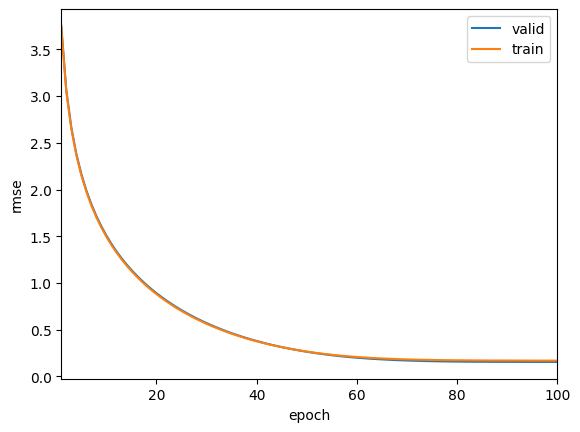

In [49]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

In [52]:
import os
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    # train_ls, _ = train(net, train_features, train_labels, None, None,
                        # num_epochs, lr, weight_decay, batch_size)
    data = get_k_fold_data(5, 1, train_features, train_labels,)
    net = get_net()
    train_ls, valid_ls = train(net, *data, num_epochs, lr,
                                weight_decay, batch_size)
    print(train_l)
    plt.plot(np.arange(1, num_epochs + 1), [train_l], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'训练log rmse：{float(train_l[-1]):f}')
    # 将网络应用于测试集。
    preds = net(test_features).detach().numpy()
    # 将其重新格式化以导出到Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    if not os.path.exists('results'):
        os.makedirs('results')
    submission.to_csv('results/submission.csv', index=False)

In [ ]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

### 4.深度学习计算
之前首次介绍神经网络时，我们关注的是具有单一输出的线性模型。 在这里，整个模型只有一个输出。 注意，单个神经网络 （1）接受一些输入； （2）生成相应的标量输出； （3）具有一组相关 参数（parameters），更新这些参数可以优化某目标函数。

然后，当考虑具有多个输出的网络时， 我们利用矢量化算法来描述整层神经元。 像单个神经元一样，层（1）接受一组输入， （2）生成相应的输出， （3）由一组可调整参数描述。 当我们使用softmax回归时，一个单层本身就是模型。 然而，即使我们随后引入了多层感知机，我们仍然可以认为该模型保留了上面所说的基本架构。

对于多层感知机而言，整个模型及其组成层都是这种架构。 整个模型接受原始输入（特征），生成输出（预测）， 并包含一些参数（所有组成层的参数集合）。 同样，每个单独的层接收输入（由前一层提供）， 生成输出（到下一层的输入），并且具有一组可调参数， 这些参数根据从下一层反向传播的信号进行更新。

事实证明，研究讨论“比单个层大”但“比整个模型小”的组件更有价值。 例如，在计算机视觉中广泛流行的ResNet-152架构就有数百层， 这些层是由层组（groups of layers）的重复模式组成。 这个ResNet架构赢得了2015年ImageNet和COCO计算机视觉比赛 的识别和检测任务 (He et al., 2016)。 目前ResNet架构仍然是许多视觉任务的首选架构。 在其他的领域，如自然语言处理和语音， 层组以各种重复模式排列的类似架构现在也是普遍存在。

为了实现这些复杂的网络，我们引入了神经网络块的概念。 块（block）可以描述单个层、由多个层组成的组件或整个模型本身。 使用块进行抽象的一个好处是可以将一些块组合成更大的组件， 这一过程通常是递归的，如 图5.1.1所示。 通过定义代码来按需生成任意复杂度的块， 我们可以通过简洁的代码实现复杂的神经网络。

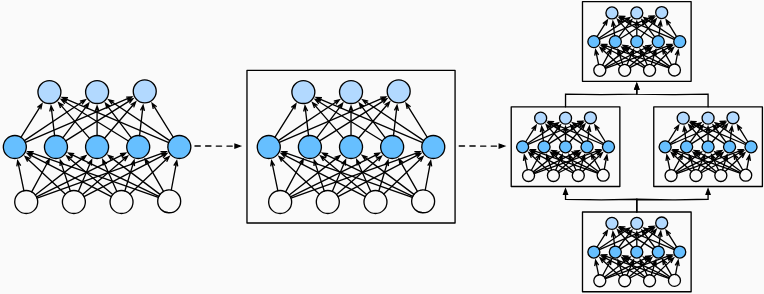

图5.1.1 多个层被组合成块，形成更大的模型

从编程的角度来看，块由类（class）表示。 它的任何子类都必须定义一个将其输入转换为输出的前向传播函数， 并且必须存储任何必需的参数。 注意，有些块不需要任何参数。 最后，为了计算梯度，块必须具有反向传播函数。 在定义我们自己的块时，由于自动微分（在 2.5节 中引入） 提供了一些后端实现，我们只需要考虑前向传播函数和必需的参数。

在构造自定义块之前，我们先回顾一下多层感知机 （ 4.3节 ）的代码。 下面的代码生成一个网络，其中包含一个具有256个单元和ReLU激活函数的全连接隐藏层， 然后是一个具有10个隐藏单元且不带激活函数的全连接输出层。

In [1]:
import torch
from torch import nn
from torch.nn import functional as F

net = nn.Sequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))

X = torch.rand(2, 20)
net(X)

tensor([[-0.0403,  0.0034,  0.1940,  0.0767, -0.2332,  0.2664, -0.1951,  0.0780,
          0.0411, -0.1221],
        [-0.0373, -0.1172,  0.0222,  0.0414, -0.2386,  0.4381, -0.1750,  0.0853,
          0.1105, -0.2109]], grad_fn=<AddmmBackward0>)

在这个例子中，我们通过实例化nn.Sequential来构建我们的模型， 层的执行顺序是作为参数传递的。 简而言之，nn.Sequential定义了一种特殊的Module， 即在PyTorch中表示一个块的类， 它维护了一个由Module组成的有序列表。 注意，两个全连接层都是Linear类的实例， Linear类本身就是Module的子类。 另外，到目前为止，我们一直在通过net(X)调用我们的模型来获得模型的输出。 这实际上是net.__call__(X)的简写。 这个前向传播函数非常简单： 它将列表中的每个块连接在一起，将每个块的输出作为下一个块的输入。

#### 自定义块

将输入数据作为其前向传播函数的参数。

通过前向传播函数来生成输出。请注意，输出的形状可能与输入的形状不同。例如，我们上面模型中的第一个全连接的层接收一个20维的输入，但是返回一个维度为256的输出。

计算其输出关于输入的梯度，可通过其反向传播函数进行访问。通常这是自动发生的。

存储和访问前向传播计算所需的参数。

根据需要初始化模型参数。

在下面的代码片段中，我们从零开始编写一个块。 它包含一个多层感知机，其具有256个隐藏单元的隐藏层和一个10维输出层。 注意，下面的MLP类继承了表示块的类。 我们的实现只需要提供我们自己的构造函数（Python中的__init__函数）和前向传播函数。

In [3]:
class MLP(nn.Module):
    # 用模型参数声明层。这里，我们声明两个全连接的层
    def __init__(self):
        # 调用MLP的父类Module的构造函数来执行必要的初始化。
        # 这样，在类实例化时也可以指定其他函数参数，例如模型参数params（稍后将介绍）
        super().__init__()
        self.hidden = nn.Linear(20, 256)  # 隐藏层
        self.out = nn.Linear(256, 10)  # 输出层

    # 定义模型的前向传播，即如何根据输入X返回所需的模型输出
    def forward(self, X):
        # 注意，这里我们使用ReLU的函数版本，其在nn.functional模块中定义。
        # return self.out(F.relu(self.hidden(X)))
        X = self.hidden(X)
        X = F.relu(X)
        X = self.out(X)
        return X
    

net = MLP()
net(X)

tensor([[ 0.1857,  0.2169,  0.1492,  0.1786,  0.3236, -0.1545,  0.1999,  0.0571,
          0.0333,  0.2543],
        [ 0.2133,  0.1988, -0.0102,  0.1999,  0.1106, -0.1965,  0.1377, -0.1491,
          0.1016,  0.1065]], grad_fn=<AddmmBackward0>)

In [4]:
class MySequential(nn.Module):
    def __init__(self, *args):
        super().__init__()
        for idx, module in enumerate(args):
            # 这里，module是Module子类的一个实例。我们把它保存在'Module'类的成员
            # 变量_modules中。_module的类型是OrderedDict
            self._modules[str(idx)] = module

    def forward(self, X):
        # OrderedDict保证了按照成员添加的顺序遍历它们
        for block in self._modules.values():
            X = block(X) # type: ignore
        return X

In [5]:
net = MySequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))
net(X)

tensor([[-0.0069,  0.0971,  0.3961, -0.2865, -0.0104,  0.1788, -0.1491,  0.0114,
         -0.2523, -0.1845],
        [ 0.0615, -0.0161,  0.2268, -0.2358,  0.0386,  0.0485, -0.0736, -0.0062,
         -0.1818, -0.0253]], grad_fn=<AddmmBackward0>)

#### 控制流

- torch.mul(a, b) 是矩阵a和b对应位相乘，a和b的维度必须相等，比如a的维度是(1, 2)，b的维度是(1, 2)，返回的仍是(1, 2)的矩阵；

- torch.mm(a, b) 是矩阵a和b矩阵相乘，比如a的维度是(1, 2)，b的维度是(2, 3)，返回的就是(1, 3)的矩阵。

- torch.bmm() 强制规定维度和大小相同

- torch.matmul() 没有强制规定维度和大小，可以用利用广播机制进行不同维度的相乘操作


注意，在返回输出之前，模型做了一些不寻常的事情： 它运行了一个while循环，在$L_1$范数大于1的条件下， 将输出向量除以2，直到它满足条件为止。 最后，模型返回了X中所有项的和。 注意，此操作可能不会常用于在任何实际任务中， 我们只展示如何将任意代码集成到神经网络计算的流程中。

In [27]:
class FixedHiddenMLP(nn.Module):
    def __init__(self):
        super().__init__()
        # 不计算梯度的随机权重参数。因此其在训练期间保持不变
        self.rand_weight = torch.rand((20, 20), requires_grad=False)
        self.linear = nn.Linear(20, 20)
        # self.c = nn.Bilinear(self.rand_weight, self.rand_weight,out_features=6)

    def forward(self, X):
        X = self.linear(X)
        # 使用创建的常量参数以及relu和mm函数
        X = F.relu(torch.mm(X, self.rand_weight) + 1)
        # 复用全连接层。这相当于两个全连接层共享参数
        X = self.linear(X)
        # 控制流
        while X.abs().sum() > 1:
            X /= 2
        if X.sum()>100:
            X = self.linear(X)
            X /= 100
        else:
            # X = self.c(X)
            X = self.linear(X)
            X /= 200
        return X.sum()

In [36]:
net = FixedHiddenMLP()
net(X)

tensor(0.0021, grad_fn=<SumBackward0>)

#### 参数访问

我们从已有模型中访问参数。 当通过Sequential类定义模型时， 我们可以通过索引来访问模型的任意层。 这就像模型是一个列表一样，每层的参数都在其属性中。 如下所示，我们可以检查第二个全连接层的参数。

In [1]:
import torch
from torch import nn

net = nn.Sequential(nn.Linear(4, 8), nn.ReLU(), nn.Linear(8, 1))
X = torch.rand(size=(2, 4))
net(X)

tensor([[-0.2507],
        [-0.3264]], grad_fn=<AddmmBackward0>)

In [2]:
print(net[2].state_dict())

OrderedDict({'weight': tensor([[-0.2020,  0.0806, -0.2688, -0.2352, -0.1760,  0.2542, -0.0371,  0.0680]]), 'bias': tensor([-0.0346])})


注意，每个参数都表示为参数类的一个实例。 要对参数执行任何操作，首先我们需要访问底层的数值。 有几种方法可以做到这一点。有些比较简单，而另一些则比较通用。 下面的代码从第二个全连接层（即第三个神经网络层）提取偏置， 提取后返回的是一个参数类实例，并进一步访问该参数的值。

In [3]:
print(type(net[2].bias))
print(net[2].bias)
print(net[2].bias.data)

<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([-0.0346], requires_grad=True)
tensor([-0.0346])


##### 访问所有参数

当我们需要对所有参数执行操作时，逐个访问它们可能会很麻烦。 当我们处理更复杂的块（例如，嵌套块）时，情况可能会变得特别复杂， 因为我们需要递归整个树来提取每个子块的参数。 下面，我们将通过演示来比较访问第一个全连接层的参数和访问所有层。

In [4]:
print(*[(name, param.shape) for name, param in net[0].named_parameters()])
print(*[(name, param.shape) for name, param in net.named_parameters()])

('weight', torch.Size([8, 4])) ('bias', torch.Size([8]))
('0.weight', torch.Size([8, 4])) ('0.bias', torch.Size([8])) ('2.weight', torch.Size([1, 8])) ('2.bias', torch.Size([1]))


In [5]:
## 嵌套块参数访问约定


def block1():
    return nn.Sequential(nn.Linear(4, 8), nn.ReLU(),
                         nn.Linear(8, 4), nn.ReLU())

def block2():
    net = nn.Sequential()
    for i in range(4):
        # 在这里嵌套
        net.add_module(f'block {i}', block1())
    return net

rgnet = nn.Sequential(block2(), nn.Linear(4, 1))
rgnet(X)

tensor([[0.3778],
        [0.3778]], grad_fn=<AddmmBackward0>)

In [6]:
print(rgnet)

Sequential(
  (0): Sequential(
    (block 0): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 1): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 2): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 3): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
  )
  (1): Linear(in_features=4, out_features=1, bias=True)
)


In [7]:
rgnet[0][1][0].bias.data

tensor([ 0.0836, -0.3754,  0.1411, -0.3130, -0.2233,  0.2942, -0.2781,  0.3650])

##### nn.init

让我们首先调用内置的初始化器。 下面的代码将所有权重参数初始化为标准差为0.01的高斯随机变量， 且将偏置参数设置为0。

我们还可以将所有参数初始化为给定的常数，比如初始化为1。

我们还可以对某些块应用不同的初始化方法。 例如，下面我们使用Xavier初始化方法初始化第一个神经网络层， 然后将第三个神经网络层初始化为常量值42。

In [8]:
def init_normal(m):   # 方法1
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, mean=0, std=0.01)
        nn.init.zeros_(m.bias)
net.apply(init_normal)
net[0].weight.data[0], net[0].bias.data[0]

(tensor([-0.0043, -0.0134,  0.0043,  0.0041]), tensor(0.))

In [9]:
def init_constant(m):  # 方法2
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 1)
        nn.init.zeros_(m.bias)
net.apply(init_constant)
net[0].weight.data[0], net[0].bias.data[0]

(tensor([1., 1., 1., 1.]), tensor(0.))

In [10]:
def init_xavier(m):  # 方法3
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
def init_42(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 42)

net[0].apply(init_xavier)
net[2].apply(init_42)
print(net[0].weight.data[0])
print(net[2].weight.data)

tensor([-0.2986, -0.1091,  0.5635,  0.2381])
tensor([[42., 42., 42., 42., 42., 42., 42., 42.]])


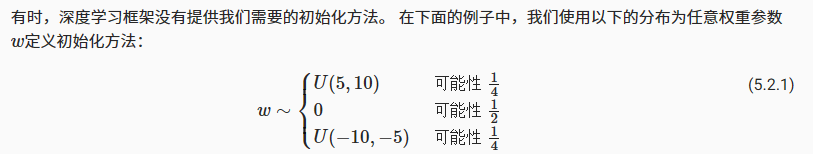

In [11]:
def my_init(m):
    if type(m) == nn.Linear:
        print("Init", *[(name, param.shape)
                        for name, param in m.named_parameters()][0])
        nn.init.uniform_(m.weight, -10, 10)
        m.weight.data *= m.weight.data.abs() >= 5

net.apply(my_init)
net[0].weight[:2]

Init weight torch.Size([8, 4])
Init weight torch.Size([1, 8])


tensor([[-0.0000, -0.0000,  7.5029,  8.5850],
        [ 0.0000,  0.0000, -8.2800,  0.0000]], grad_fn=<SliceBackward0>)

In [12]:
net[0].weight.data[:] += 1
net[0].weight.data[0, 0] = 42
net[0].weight.data[0]

tensor([42.0000,  1.0000,  8.5029,  9.5850])

In [13]:
# 我们需要给共享层一个名称，以便可以引用它的参数
shared = nn.Linear(8, 8)
net = nn.Sequential(nn.Linear(4, 8), nn.ReLU(),
                    shared, nn.ReLU(),
                    shared, nn.ReLU(),
                    nn.Linear(8, 1))
net(X)
# 检查参数是否相同
print(net[2].weight.data[0] == net[4].weight.data[0])
net[2].weight.data[0, 0] = 100
# 确保它们实际上是同一个对象，而不只是有相同的值
print(net[2].weight.data[0] == net[4].weight.data[0])

tensor([True, True, True, True, True, True, True, True])
tensor([True, True, True, True, True, True, True, True])


#### 延后初始化

#### 自定义层

下面的CenteredLayer类要从其输入中减去均值。 要构建它，我们只需继承基础层类并实现前向传播功能。

In [15]:
import torch
import torch.nn.functional as F
from torch import nn


class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        return X - X.mean()

In [16]:
layer = CenteredLayer()
layer(torch.FloatTensor([1, 2, 3, 4, 5]))

tensor([-2., -1.,  0.,  1.,  2.])

现在，我们可以将层作为组件合并到更复杂的模型中

In [17]:
net = nn.Sequential(nn.Linear(8, 128), CenteredLayer())

作为额外的健全性检查，我们可以在向该网络发送随机数据后，检查均值是否为0。 由于我们处理的是浮点数，因为存储精度的原因，我们仍然可能会看到一个非常小的非零数。

In [18]:
Y = net(torch.rand(4, 8))
Y.mean()

tensor(9.7789e-09, grad_fn=<MeanBackward0>)

现在，让我们实现自定义版本的全连接层。 回想一下，该层需要两个参数，一个用于表示权重，另一个用于表示偏置项。 在此实现中，我们使用修正线性单元作为激活函数。 该层需要输入参数：in_units和units，分别表示输入数和输出数。

In [4]:
class MyLinear(nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_units, units))
        self.bias = nn.Parameter(torch.randn(units,))
    def forward(self, X):
        linear = torch.matmul(X, self.weight.data) + self.bias.data
        return F.relu(linear)

In [5]:
linear = MyLinear(5, 3)
linear.weight

Parameter containing:
tensor([[-0.1435, -0.7975,  0.3048],
        [ 0.2593, -0.9380, -0.2157],
        [ 0.4203, -2.6963, -0.0801],
        [-0.9539, -0.2958, -0.7954],
        [-1.5231,  0.5549,  0.2436]], requires_grad=True)

In [21]:
linear(torch.rand(2, 5))

tensor([[1.5455, 0.0000, 0.0000],
        [0.2415, 0.0000, 0.5941]])

In [6]:
net = nn.Sequential(MyLinear(64, 8), MyLinear(8, 1))
net(torch.rand(2, 64))

tensor([[0.],
        [0.]])

作业？

In [ ]:
import torch
from torch import nn

class CustomTensorReductionLayer(nn.Module):
    """
    A custom layer that computes the operation y_k = sum_{i, j} W_ijk * x_i * x_j,
    where W is a 3D tensor of weights and x is a 2D input tensor.
    """
    def __init__(self, input_dim, output_dim):
        """
        Initialize the layer with given input and output dimensions for weights.
        
        :param input_dim: The dimensionality of the input features (x_i and x_j).
        :param output_dim: The dimensionality of the output features (y_k).
        """
        super(CustomTensorReductionLayer, self).__init__()
        # Weight tensor initialized randomly, dimensions are (input_dim, input_dim, output_dim)
        self.weight = nn.Parameter(torch.randn(input_dim, input_dim, output_dim))
        
    def forward(self, x):
        """
        Forward pass of the layer.
        
        :param x: Input tensor of shape (batch_size, input_dim).
        :return: Output tensor of shape (batch_size, output_dim).
        """
        # Expand dimensions to enable broadcasting for the multiplication
        x_expanded = x.unsqueeze(2).unsqueeze(3)  # Shape becomes (batch_size, input_dim, 1, 1)
        
        # Compute the outer product of x and then multiply with the weight tensor
        # The einsum operation is used here to perform the required contraction
        output = torch.einsum('bij,ijk->bk', x_expanded**2, self.weight)
        
        return output

# Example usage:
input_dim = 4  # Example input feature size
output_dim = 3  # Example output feature size
layer = CustomTensorReductionLayer(input_dim, output_dim)
input_tensor = torch.randn(2, input_dim)  # Batch size 2
output = layer(input_tensor)
print("Output shape:", output.shape)  # Expected to be (2, output_dim)

#### 加载和保存数据


In [1]:
import torch
from torch import nn
from torch.nn import functional as F

x = torch.arange(4)
torch.save(x, 'x-file')


In [2]:
x2 = torch.load('x-file')
x2

tensor([0, 1, 2, 3])

In [3]:
y = torch.zeros(1000)
torch.save([x,y],"x-files")

x2,y2 = torch.load('x-files')
(x2,y2)

(tensor([0, 1, 2, 3]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.,

##### 保存模型参数及恢复

In [12]:
torch.save(net.state_dict(), 'mlp.params')
print(net)

Sequential(
  (0): MyLinear()
  (1): MyLinear()
)


In [13]:
clone =  nn.Sequential(MyLinear(64, 8), MyLinear(8, 1))
clone.load_state_dict(torch.load('mlp.params'))
clone.eval()

Sequential(
  (0): MyLinear()
  (1): MyLinear()
)

#### GPU


In [14]:
!nvidia-smi

Sun May  5 12:30:05 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.92       Driver Version: 528.92       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   37C    P8     9W /  80W |     27MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
import torch
from torch import nn

torch.device('cpu'), torch.device('cuda'), torch.device('cuda:1')

(device(type='cpu'), device(type='cuda'), device(type='cuda', index=1))

In [16]:
torch.cuda.device_count()

1

In [10]:
"""
现在我们定义了两个方便的函数， 这两个函数允许我们在不存在所需所有GPU的情况下运行代码。
"""

def try_gpu(i=0):  #@save
    """如果存在，则返回gpu(i)，否则返回cpu()"""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

def try_all_gpus():  #@save
    """返回所有可用的GPU，如果没有GPU，则返回[cpu(),]"""
    devices = [torch.device(f'cuda:{i}')
             for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]

try_gpu(), try_gpu(10), try_all_gpus()

(device(type='cuda', index=0),
 device(type='cpu'),
 [device(type='cuda', index=0)])

In [20]:
X = torch.ones(2, 3, device=try_gpu())
Y = torch.rand(2, 3, device=try_gpu(1))
Y

# 复制到另一个GPU上
# Z = X.cuda(1)
# print(X)
# print(Z)

tensor([[0.1348, 0.8043, 0.7924],
        [0.5842, 0.9882, 0.6885]])

### 5.卷积神经网络


In [1]:
import torch
from torch import nn
# from d2l import torch as d2l

def corr2d(X, K):  #@save
    """
    计算二维互相关运算
    K->kernal
    X->输入数据
    """
    h, w = K.shape
    # print(torch.randn(K.shape))
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    # print(Y)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [2]:
X = torch.tensor([[0.0, 1.0, 2.0,4.1], [3.0, 4.0, 5.0,23], [3.0, 4.0, 5.0,23], [6.0, 7.0, 8.0,12]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[ 19.0000,  25.0000,  83.1000],
        [ 22.0000,  28.0000, 102.0000],
        [ 37.0000,  43.0000,  75.0000]])

In [3]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

In [4]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [5]:
K = torch.tensor([[1.0, -1.0]])
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [6]:
corr2d(X.t(), K)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

#### 学习卷积核

In [7]:
# 构造一个二维卷积层，它具有1个输出通道和形状为（1，2）的卷积核
conv2d = nn.Conv2d(1,1, kernel_size=(1, 2), bias=False)

# 这个二维卷积层使用四维输入和输出格式（批量大小、通道、高度、宽度），
# 其中批量大小和通道数都为1
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2  # 学习率

for i in range(20):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    # 迭代卷积核
    conv2d.weight.data[:] -= lr * conv2d.weight.grad # type: ignore
    if (i + 1) % 2 == 0:
        print(f'epoch {i+1}, loss {l.sum():.3f}')

epoch 2, loss 5.275
epoch 4, loss 1.177
epoch 6, loss 0.317
epoch 8, loss 0.102
epoch 10, loss 0.037
epoch 12, loss 0.014
epoch 14, loss 0.006
epoch 16, loss 0.002
epoch 18, loss 0.001
epoch 20, loss 0.000


In [8]:
conv2d.weight.data.reshape((1, 2))

tensor([[ 1.0019, -0.9978]])

In [9]:
X = torch.ones((8, 8))
for i in range(8):
    X[i,i] = 0
X

tensor([[0., 1., 1., 1., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 1., 1., 0., 1., 1.],
        [1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 0.]])

In [10]:
K = torch.tensor([[1.0, -1.0],[1.0,-1.0]]) # 对角线卷积核
Y = corr2d(X, K)
Y

tensor([[ 0., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.]])

#### 填充和步幅


In [13]:
import torch
from torch import nn


# 为了方便起见，我们定义了一个计算卷积层的函数。
# 此函数初始化卷积层权重，并对输入和输出提高和缩减相应的维数
def comp_conv2d(conv2d, X):
    # 这里的（1，1）表示批量大小和通道数都是1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # 省略前两个维度：批量大小和通道
    return Y.reshape(Y.shape[2:])

# 请注意，这里每边都填充了1行或1列，因此总共添加了2行或2列
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [14]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

填充可以增加输出的高度和宽度。这常用来使输出与输入具有相同的高和宽。

步幅可以减小输出的高和宽，例如输出的高和宽仅为输入的高和宽的1/n（n是一个大于的整数）。

填充和步幅可用于有效地调整数据的维度。

In [1]:
!nvidia-smi

Mon May 13 11:06:09 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.92       Driver Version: 528.92       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   36C    P8    13W /  20W |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### 多输入输出通道


In [55]:
import torch

def corr2d(x,k):
    if len(k.shape)>2:
        h,w,k = k.shape
    else:
        h,w = k.shape
    Y = torch.zeros((x.shape[0]-h+1,x.shape[1]-w+1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j] = (x[i:i+h,j:j+w]*k).sum()
    return Y

def corr2d_multi_in(X,K):
    return sum(corr2d(x,k) for x,k in zip(X,K))

In [56]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

In [57]:

def corr2d_multi_in_out(X, K):
    # 迭代“K”的第0个维度，每次都对输入“X”执行互相关运算。
    # 最后将所有结果都叠加在一起
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0) # type: ignore

In [58]:
K = torch.stack((K,K+1,K+2),0)
K.shape

torch.Size([3, 2, 2, 2])

1*1卷积

In [59]:
def corr2d_multi_in_out_1x1(X,K):
    c1,h,w = X.shape
    c0 = K.shape[0]
    X = X.reshape((c1,h*w))
    K = K.reshape((c0,c1))
    Y = torch.matmul(K,X)
    return Y.reshape((c0,h,w))


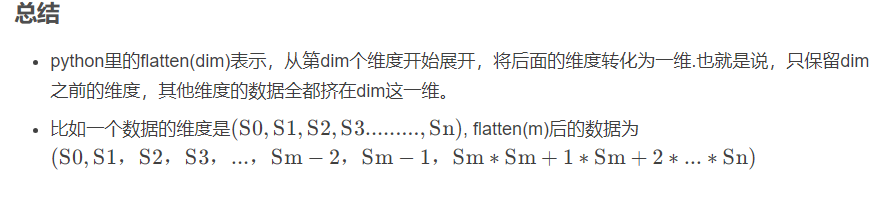

In [60]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))

Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

In [71]:
def pooling(X,K,mode = "max"):
    h,w = X.shape
    Y = torch.zeros((h-K.shape[0]+1,w-K.shape[1]+1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == "max":
                Y[i,j] = torch.max(X[i:i+K.shape[0],j:j+K.shape[1]])
            elif mode == "mean":
                Y[i,j] = torch.mean(X[i:i+K.shape[0],j:j+K.shape[1]])
    return Y

In [72]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pooling(X, torch.zeros((2,2)))

tensor([[4., 5.],
        [7., 8.]])

In [73]:
pooling(X, torch.zeros((2,2)),mode="mean")

tensor([[2., 3.],
        [5., 6.]])

In [87]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [88]:
import torch.nn as nn

pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [89]:
X = torch.cat((X, X + 1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [90]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

#### LeNet

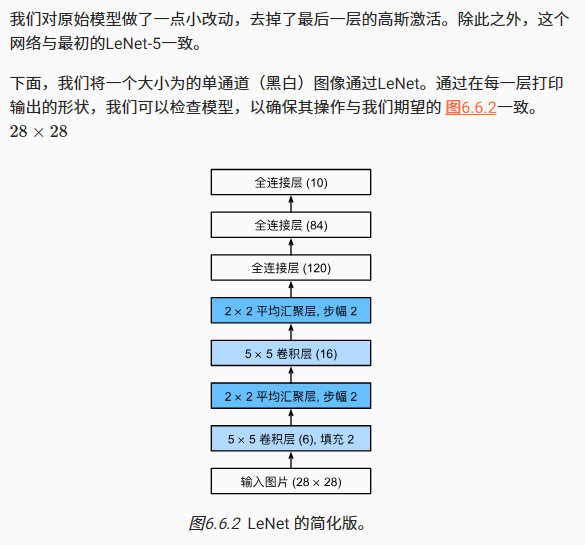


In [42]:
import torch
import torch.nn as nn

net = nn.Sequential(
    nn.Conv2d(1,6,kernel_size = 5,padding = 2),nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2,stride=2),
    nn.Conv2d(6,16,kernel_size = 5),nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2,stride=2),
    nn.Flatten(),
    nn.Linear(16*5*5,120),nn.LeakyReLU(),
    nn.Linear(120,84),nn.LeakyReLU(),
    nn.Linear(84,10)
)
net

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): LeakyReLU(negative_slope=0.01)
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): LeakyReLU(negative_slope=0.01)
  (11): Linear(in_features=84, out_features=10, bias=True)
)

In [43]:
import torch
from torch import nn
# 导入记好了，         2维卷积，2维最大池化，展成1维，全连接层，构建网络结构辅助工具,2d网络归一化,激活函数,自适应平均池化
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential, BatchNorm2d, ReLU, AdaptiveAvgPool2d
from torchsummary import summary


class Resnet18(nn.Module):
    def __init__(self, num_classes):
        super(Resnet18, self).__init__()
        self.model0 = Sequential(
            # 0
            # 输入3通道、输出64通道、卷积核大小、步长、补零、
            Conv2d(in_channels=1, out_channels=64, kernel_size=(5, 5), stride=2, padding=3),
            BatchNorm2d(64),
            ReLU(),
            MaxPool2d(kernel_size=(3, 3), stride=2, padding=1),
        )
        self.model1 = Sequential(
            # 1.1
            Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=1, padding=1),
            BatchNorm2d(64),
            ReLU(),
            Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=1, padding=1),
            BatchNorm2d(64),
            ReLU(),
        )

        self.R1 = ReLU()

        self.model2 = Sequential(
            # 1.2
            Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=1, padding=1),
            BatchNorm2d(64),
            ReLU(),
            Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=1, padding=1),
            BatchNorm2d(64),
            ReLU(),
        )

        self.R2 = ReLU()

        self.model3 = Sequential(
            # 2.1
            Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride=2, padding=1),
            BatchNorm2d(128),
            ReLU(),
            Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=1, padding=1),
            BatchNorm2d(128),
            ReLU(),
        )
        self.en1 = Sequential(
            Conv2d(in_channels=64, out_channels=128, kernel_size=(1, 1), stride=2, padding=0),
            BatchNorm2d(128),
            ReLU(),
        )
        self.R3 = ReLU()

        self.model4 = Sequential(
            # 2.2
            Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=1, padding=1),
            BatchNorm2d(128),
            ReLU(),
            Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=1, padding=1),
            BatchNorm2d(128),
            ReLU(),
        )
        self.R4 = ReLU()

        self.model5 = Sequential(
            # 3.1
            Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), stride=2, padding=1),
            BatchNorm2d(256),
            ReLU(),
            Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=1, padding=1),
            BatchNorm2d(256),
            ReLU(),
        )
        self.en2 = Sequential(
            Conv2d(in_channels=128, out_channels=256, kernel_size=(1, 1), stride=2, padding=0),
            BatchNorm2d(256),
            ReLU(),
        )
        self.R5 = ReLU()

        self.model6 = Sequential(
            # 3.2
            Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=1, padding=1),
            BatchNorm2d(256),
            ReLU(),
            Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=1, padding=1),
            BatchNorm2d(256),
            ReLU(),
        )
        self.R6 = ReLU()

        self.model7 = Sequential(
            # 4.1
            Conv2d(in_channels=256, out_channels=512, kernel_size=(3, 3), stride=2, padding=1),
            BatchNorm2d(512),
            ReLU(),
            Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=1, padding=1),
            BatchNorm2d(512),
            ReLU(),
        )
        self.en3 = Sequential(
            Conv2d(in_channels=256, out_channels=512, kernel_size=(1, 1), stride=2, padding=0),
            BatchNorm2d(512),
            ReLU(),
        )
        self.R7 = ReLU()

        self.model8 = Sequential(
            # 4.2
            Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=1, padding=1),
            BatchNorm2d(512),
            ReLU(),
            Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=1, padding=1),
            BatchNorm2d(512),
            ReLU(),
        )
        self.R8 = ReLU()

        # AAP 自适应平均池化
        self.aap = AdaptiveAvgPool2d((1, 1))
        # flatten 维度展平
        self.flatten = Flatten(start_dim=1)
        # FC 全连接层
        self.fc = Linear(512, num_classes)

    def forward(self, x):
        x = self.model0(x)

        f1 = x
        x = self.model1(x)
        x = x + f1
        x = self.R1(x)

        f1_1 = x
        x = self.model2(x)
        x = x + f1_1
        x = self.R2(x)

        f2_1 = x
        f2_1 = self.en1(f2_1)
        x = self.model3(x)
        x = x + f2_1
        x = self.R3(x)

        f2_2 = x
        x = self.model4(x)
        x = x + f2_2
        x = self.R4(x)

        f3_1 = x
        f3_1 = self.en2(f3_1)
        x = self.model5(x)
        x = x + f3_1
        x = self.R5(x)

        f3_2 = x
        x = self.model6(x)
        x = x + f3_2
        x = self.R6(x)

        f4_1 = x
        f4_1 = self.en3(f4_1)
        x = self.model7(x)
        x = x + f4_1
        x = self.R7(x)

        f4_2 = x
        x = self.model8(x)
        x = x + f4_2 
        x = self.R8(x)

        # 最后3个
        x = self.aap(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x


net = Resnet18(10)
net

Resnet18(
  (model0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (model1): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (R1): ReLU()
  (model2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Bat

In [2]:
# X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
# for layer in net:
#     X = layer(X)
#     print(layer.__class__.__name__,'output shape: \t',X.shape)
#     # print(net.forward(X))

In [41]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size=batch_size)

In [36]:
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # BERT微调所需的（之后将介绍）
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [43]:
#@save
import time

def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """用GPU训练模型"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    # net.load_state_dict(torch.load(r'model\ResModel38_old.pth'))
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr,momentum=0.09)
    loss = nn.CrossEntropyLoss()
    timer1, num_batches =  time.time(), len(train_iter)
    best_test_acc = 0
    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，样本数
        metric = Accumulator(3)
        # 积累器
        net.train() # 设定训练模式
        for i, (X, y) in enumerate(train_iter):
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], accuracy(y_hat, y), X.shape[0])
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        # print(f'test acc {test_acc:.3f}')
        if test_acc > best_test_acc:
            # 保存模型
            torch.save(net.state_dict(),'model/Model'+str(epoch)+'.pth')
            print(f"save Model in 'model/Model{str(epoch)}.pth'...")
            best_test_acc = test_acc
            print(f'loss {train_l:.3f}, train acc {train_acc:.3f}', f'test acc {test_acc:.3f}')
        # if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
        #     animator.add(epoch + (i + 1) / num_batches,
        #                  (train_l, train_acc, None))
        timer2 = time.time()
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{timer1-timer2:.1f} examples/sec '
          f'on {str(device)}')


In [45]:
%matplotlib inline
from MyUtils import train_model
from MyUtils import load_data_fashion_mnist, try_gpu, accuracy, Accumulator, evaluate_accuracy


lr, num_epochs = 0.3, 40
train_model(net, train_iter, test_iter, num_epochs, lr, try_gpu())

training on cuda:0
save Model in 'model/Model0.pth'...
loss 0.471, train acc 0.830 test acc 0.864
save Model in 'model/Model5.pth'...
loss 0.175, train acc 0.934 test acc 0.881
save Model in 'model/Model7.pth'...
loss 0.143, train acc 0.945 test acc 0.894
save Model in 'model/Model12.pth'...
loss 0.085, train acc 0.968 test acc 0.905
save Model in 'model/Model17.pth'...
loss 0.047, train acc 0.982 test acc 0.912
save Model in 'model/Model26.pth'...
loss 0.018, train acc 0.994 test acc 0.915
save Model in 'model/Model28.pth'...
loss 0.016, train acc 0.995 test acc 0.917
save Model in 'model/Model29.pth'...
loss 0.011, train acc 0.996 test acc 0.918
save Model in 'model/Model35.pth'...
loss 0.008, train acc 0.997 test acc 0.921
loss 0.005, train acc 0.999, test acc 0.916
-2361.0 examples/sec on cuda:0


### 现代卷积神经网络


#### AlexNet

In [39]:
import torch
from torch import nn


net = nn.Sequential(
    # 这里使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10))

In [40]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [41]:
batch_size = 128
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224)

In [ ]:
lr, num_epochs = 0.01, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, try_gpu())

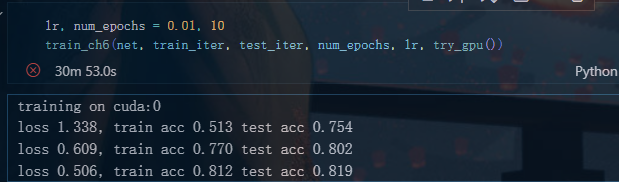

#### VGG

In [1]:
import torch
from torch import nn
# from d2l import torch as d2l


def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

# [下面的代码实现了VGG-11。可以通过在conv_arch上执行for循环来简单实现]
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [2]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # 全连接层部分
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))


net = vgg(conv_arch)

In [3]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__, 'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [4]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

In [ ]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224)
train_ch6(net, train_iter, test_iter, num_epochs, lr, try_gpu())

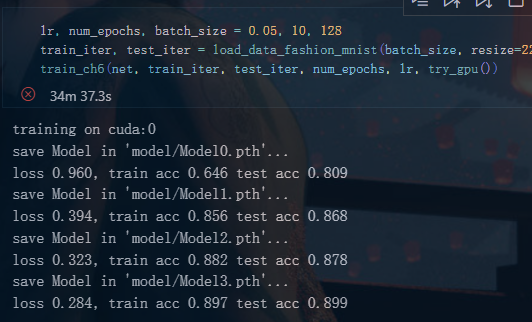

#### NiN

LeNet、AlexNet和VGG都有一个共同的设计模式：通过一系列的卷积层与汇聚层来提取空间结构特征；然后通过全连接层对特征的表征进行处理。 AlexNet和VGG对LeNet的改进主要在于如何扩大和加深这两个模块。 或者，可以想象在这个过程的早期使用全连接层。然而，如果使用了全连接层，可能会完全放弃表征的空间结构。 网络中的网络（NiN）提供了一个非常简单的解决方案：在每个像素的通道上分别使用多层感知机 (Lin et al., 2013)


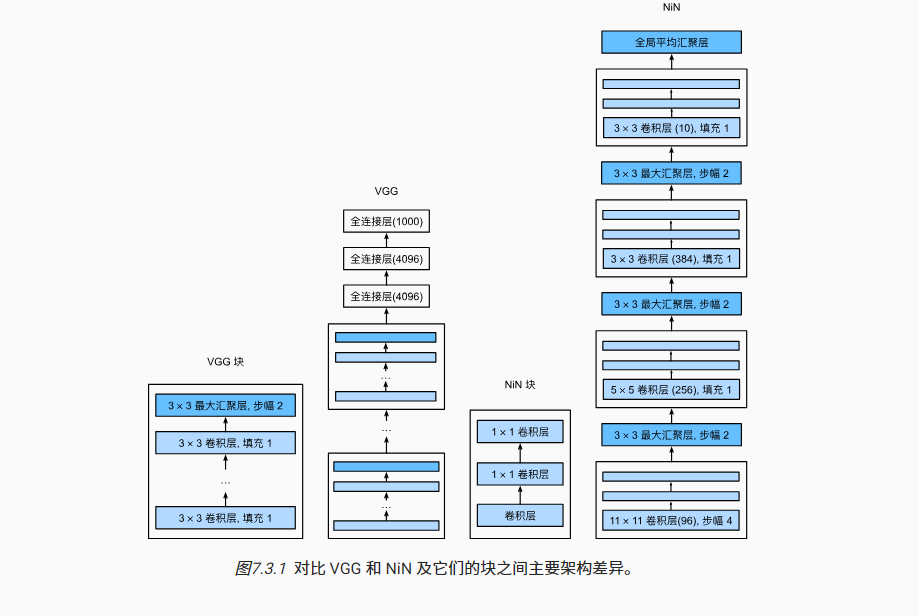

In [6]:
import torch
from torch import nn
# from d2l import torch as d2l


def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())

In [7]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # 标签类别数是10
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # 将四维的输出转成二维的输出，其形状为(批量大小,10)
    nn.Flatten())

In [8]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


In [ ]:
%matplotlib inline
from MyUtils import load_data_fashion_mnist, try_gpu, accuracy, Accumulator, evaluate_accuracy
from MyUtils import train_model
# utils这个名字不能随便用，可能当前环境里有同名的包，尽量改成自己的模块名


lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224)
train_model(net, train_iter, test_iter, num_epochs, lr, try_gpu())

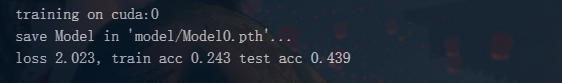

#### GoogLeNet

In [33]:
import torch
from torch import nn
from torch.nn import functional as F


class Inception(nn.Module):
    # c1--c4是每条路径的输出通道数
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # 线路1，单1x1卷积层
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        # 线路2，1x1卷积层后接3x3卷积层
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # 线路3，1x1卷积层后接5x5卷积层
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # 线路4，3x3最大汇聚层后接1x1卷积层
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        # 在通道维度上连结输出
        return torch.cat((p1, p2, p3, p4), dim=1)

In [35]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
                   nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size=3, padding=1),
                   nn.ReLU())

b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                   Inception(256, 128, (128, 192), (32, 96), 64),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
                   Inception(512, 160, (112, 224), (24, 64), 64),
                   Inception(512, 128, (128, 256), (24, 64), 64),
                   Inception(512, 112, (144, 288), (32, 64), 64),
                   Inception(528, 256, (160, 320), (32, 128), 128),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveAvgPool2d((1, 1)),
                   nn.Flatten())

net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10))

In [36]:
X = torch.rand(size=(1, 1, 96, 96))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 24, 24])
Sequential output shape:	 torch.Size([1, 480, 12, 12])
Sequential output shape:	 torch.Size([1, 832, 6, 6])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


In [38]:
%matplotlib inline
from MyUtils import load_data_fashion_mnist, try_gpu, accuracy, Accumulator, evaluate_accuracy
from MyUtils import train_model

lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=96)
train_model(net, train_iter, test_iter, num_epochs, lr, try_gpu())

training on cuda:0
save Model in 'model/Model0.pth'...
loss 2.283, train acc 0.147 test acc 0.100
save Model in 'model/Model1.pth'...
loss 1.534, train acc 0.411 test acc 0.599
save Model in 'model/Model2.pth'...
loss 0.767, train acc 0.700 test acc 0.724
save Model in 'model/Model3.pth'...
loss 0.528, train acc 0.801 test acc 0.819
save Model in 'model/Model4.pth'...
loss 0.423, train acc 0.840 test acc 0.835
save Model in 'model/Model5.pth'...
loss 0.365, train acc 0.862 test acc 0.849
save Model in 'model/Model6.pth'...
loss 0.325, train acc 0.877 test acc 0.878
save Model in 'model/Model7.pth'...
loss 0.299, train acc 0.887 test acc 0.885
loss 0.972, train acc 0.621, test acc 0.825
-977.0 examples/sec on cuda:0
